In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
from numpy import random 
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
Pandas version 0.22.0
Matplotlib version 2.1.2


In [40]:
##1000baby,may have same name
#The inital set of baby names
names = ['Bob','Jessica','Mary','John','Mel']

In [41]:
#To make a random list of 1,000 baby names using the five above we will 
#do the following:
#Generate a random number between 0 and 4#
#To do this we will be using the functions 
#seed ,randint,len,range,zip   random.seed   random.randint


In [80]:
## This will ensure the random samples below can be reproduced.
##This means the random samples will always be identical.
random.seed(2)# random.seed(number)
##generate 1000names using 5 names
random_names=[names[random.randint(low=0,high=len(names))] for i in range(1000)]
#print the first 10 names 
random_names[:10]


['Bob',
 'Bob',
 'John',
 'Mary',
 'John',
 'Bob',
 'Mary',
 'Jessica',
 'John',
 'Mary']

In [81]:
#The number of births per name for the year 1880
births=[random.randint(0,1000) for i in range(1000)]
births[:10]

[855, 374, 182, 903, 838, 53, 28, 555, 549, 932]

In [82]:
#merge using zip
BabyDataSet=list(zip(random_names,births))
BabyDataSet[:10]

[('Bob', 855),
 ('Bob', 374),
 ('John', 182),
 ('Mary', 903),
 ('John', 838),
 ('Bob', 53),
 ('Mary', 28),
 ('Jessica', 555),
 ('John', 549),
 ('Mary', 932)]

In [83]:
df=pd.DataFrame(data=BabyDataSet,columns=['Names','Births'])
df[:10]

,Names,Births
0,Bob,855
1,Bob,374
2,John,182
3,Mary,903
4,John,838
5,Bob,53
6,Mary,28
7,Jessica,555
8,John,549
9,Mary,932


In [86]:
df.to_csv('baby.txt',index=False,header=False)

In [87]:
#read .txt
Location=r'D:\rotation\LucasLab\Develop\Compensatory-Evolution\Analysis\Siming\Pandas_learning\baby.txt'
df=pd.read_csv(Location,header=None)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
0    1000 non-null object
1    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [89]:
df.head()  #first five lines

,0,1
0,Bob,855
1,Bob,374
2,John,182
3,Mary,903
4,John,838


In [90]:
df.tail()  #the last five lines

,0,1
995,John,873
996,Mel,332
997,Mary,712
998,Mary,105
999,Mary,385


In [91]:
df=pd.read_csv(Location,names=['Names','Births'])
df.head(6)

,Names,Births
0,Bob,855
1,Bob,374
2,John,182
3,Mary,903
4,John,838
5,Bob,53


In [92]:
#delete
import os
os.remove(Location)


In [124]:
#Prepare data
#find unique names of the column using unique()
#Method 1:
df['Names'].unique()   #get array


KeyError: 'Names'

In [125]:
#get unique values
for i in df['Names'].unique():
    print(i)

KeyError: 'Names'

In [126]:
#method 2:  give info involve unique()
print(df['Names'].describe())


KeyError: 'Names'

In [127]:
##aggregate data using groupby function
#create a groupby object
name=df.groupby('Names')
print(name)
#Apply the sum function to the groupby object
df=name.sum()
df

,Births
Names,
Bob,96839
Jessica,103312
John,95910
Mary,115502
Mel,91547


In [128]:
#method2 get the maximum
df['Births'].max()

115502

In [129]:
#method1 get the whole
Sorted=df.sort_values(['Births'],ascending=False)
Sorted.head(1)

,Births
Names,
Mary,115502


The most popluar name


,Births
Names,
Mary,115502
Jessica,103312
Bob,96839
John,95910
Mel,91547


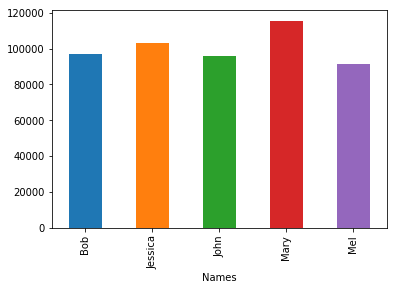

In [130]:
##present data  plot
#Create graph
df['Births'].plot.bar()  
print("The most popluar name")
df.sort_values(by='Births',ascending=False)